penguinsDatasetExploration.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/13FezyA2l9JBZ_09WW5yRVI433Dt0TCTI

# Task 1: Load the Dataset


In [1]:
# Import libs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Reading dataset
p_df = pd.read_csv('penguins.csv')
print(p_df.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  


# Task 2: Handling Missing Data

In [3]:
# Check for null data
print("Start of NULL values search \n")
print(p_df.isnull().any())
print("\nEnd NULL values search \n")

# Drop rows with any column having NA/null data
np_df = p_df.dropna()

# Check new dataframe for null values
print("Start of NULL values search \n")
print(np_df.isnull().any())
print("\nEnd NULL values search \n")

Start of NULL values search 

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

End NULL values search 

Start of NULL values search 

species              False
island               False
bill_length_mm       False
bill_depth_mm        False
flipper_length_mm    False
body_mass_g          False
sex                  False
dtype: bool

End NULL values search 



# Task 3: Summary Statistics

In [4]:
np_stats = np_df.describe()
print(np_stats)

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      333.000000     333.000000         333.000000   333.000000
mean        43.992793      17.164865         200.966967  4207.057057
std          5.468668       1.969235          14.015765   805.215802
min         32.100000      13.100000         172.000000  2700.000000
25%         39.500000      15.600000         190.000000  3550.000000
50%         44.500000      17.300000         197.000000  4050.000000
75%         48.600000      18.700000         213.000000  4775.000000
max         59.600000      21.500000         231.000000  6300.000000


In [5]:
print('\n 1)', np_df['species'].value_counts())
print('\n 2)', np_df['island'].value_counts())
print('\n 3)', np_df['sex'].value_counts())


 1) species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

 2) island
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64

 3) sex
MALE      168
FEMALE    165
Name: count, dtype: int64


# Task 3: Visualizing the Data

In [6]:
np_df_n = np_df.iloc[:, 2:6]
print(np_df_n.head())

   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0            39.1           18.7              181.0       3750.0
1            39.5           17.4              186.0       3800.0
2            40.3           18.0              195.0       3250.0
4            36.7           19.3              193.0       3450.0
5            39.3           20.6              190.0       3650.0


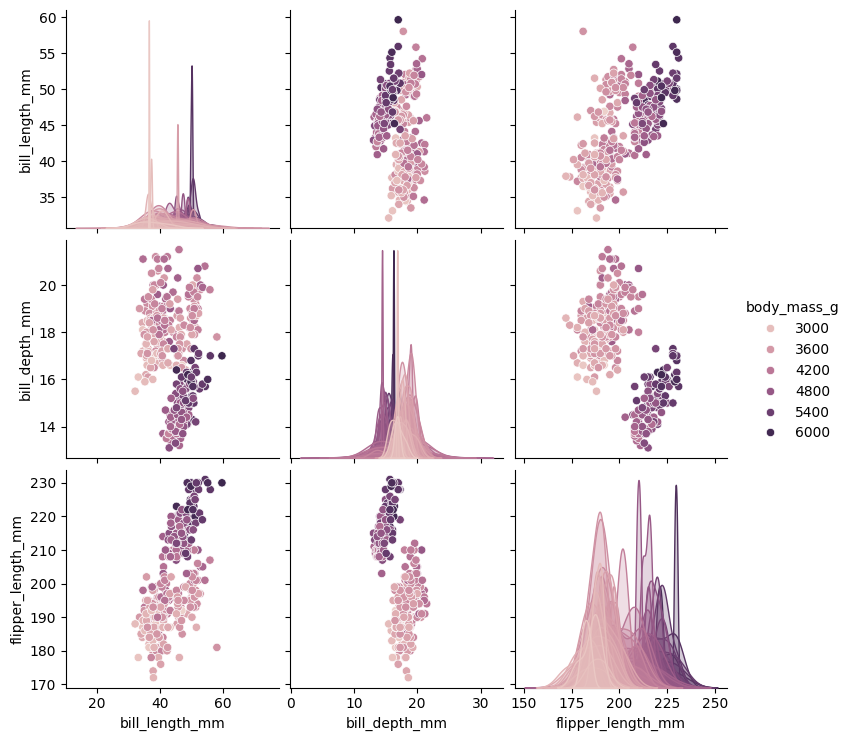

In [7]:
sns.pairplot(np_df_n, hue='body_mass_g')

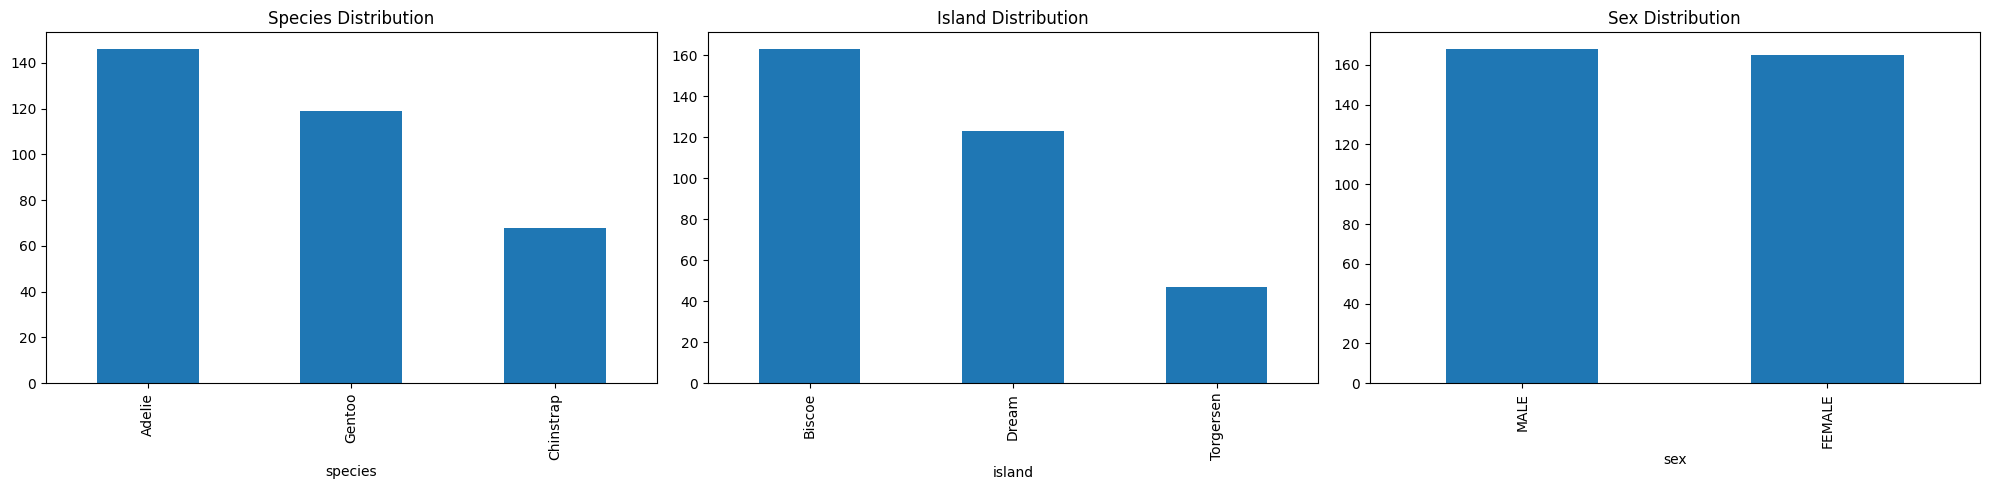

In [8]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Plot for species
np_df['species'].value_counts().plot(
    kind='bar', ax=axes[0], title='Species Distribution')

# Plot for island
np_df['island'].value_counts().plot(
    kind='bar', ax=axes[1], title='Island Distribution')

# Plot for sex
np_df['sex'].value_counts().plot(
    kind='bar', ax=axes[2], title='Sex Distribution')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Task 5: Covariance Matrix for Numeric Attributes

In [9]:
# cov_matrix of num
D = np_df_n.to_numpy()
D_center = D - np.mean(D, axis=0)
cov_matrix = np.cov(D_center, rowvar=False)
print(cov_matrix)

[[ 2.99063334e+01 -2.46209134e+00  5.00581949e+01  2.59562330e+03]
 [-2.46209134e+00  3.87788831e+00 -1.59472485e+01 -7.48456122e+02]
 [ 5.00581949e+01 -1.59472485e+01  1.96441677e+02  9.85219165e+03]
 [ 2.59562330e+03 -7.48456122e+02  9.85219165e+03  6.48372488e+05]]


The value of covariance represents the
strength in the relationship
between those two attributes.
For example Covariance between attribute 1 and 3 is 50.058
which represents a strong relationship while the relationship between
attribute 2 and 3 is -15.948 referencing a weak relationship between the two.

In [10]:
np_df_a = np_df.iloc[:, [0, 1, 6]]
print("\n\n", np_df_a)



     species     island     sex
0    Adelie  Torgersen    MALE
1    Adelie  Torgersen  FEMALE
2    Adelie  Torgersen  FEMALE
4    Adelie  Torgersen  FEMALE
5    Adelie  Torgersen    MALE
..      ...        ...     ...
338  Gentoo     Biscoe  FEMALE
340  Gentoo     Biscoe  FEMALE
341  Gentoo     Biscoe    MALE
342  Gentoo     Biscoe  FEMALE
343  Gentoo     Biscoe    MALE

[333 rows x 3 columns]


In [11]:
np_df_a_encoded = pd.get_dummies(np_df_a)
print(np_df_a_encoded)

     species_Adelie  species_Chinstrap  species_Gentoo  island_Biscoe  \
0              True              False           False          False   
1              True              False           False          False   
2              True              False           False          False   
4              True              False           False          False   
5              True              False           False          False   
..              ...                ...             ...            ...   
338           False              False            True           True   
340           False              False            True           True   
341           False              False            True           True   
342           False              False            True           True   
343           False              False            True           True   

     island_Dream  island_Torgersen  sex_FEMALE  sex_MALE  
0           False              True       False      True  
1  

In [12]:
cov_np_df_a_encoded = np_df_a_encoded.cov()
print(cov_np_df_a_encoded)

                   species_Adelie  species_Chinstrap  species_Gentoo  \
species_Adelie           0.246952          -0.089801       -0.157151   
species_Chinstrap       -0.089801           0.162994       -0.073194   
species_Gentoo          -0.157151          -0.073194        0.230345   
island_Biscoe           -0.082727          -0.100257        0.182984   
island_Dream             0.003229           0.129165       -0.132394   
island_Torgersen         0.079498          -0.028908       -0.050590   
sex_FEMALE               0.001981           0.000923       -0.002904   
sex_MALE                -0.001981          -0.000923        0.002904   

                   island_Biscoe  island_Dream  island_Torgersen  sex_FEMALE  \
species_Adelie         -0.082727      0.003229          0.079498    0.001981   
species_Chinstrap      -0.100257      0.129165         -0.028908    0.000923   
species_Gentoo          0.182984     -0.132394         -0.050590   -0.002904   
island_Biscoe           0.25064

Correlation Matrix

In [13]:
corr_matrix = np_df_n.corr()
print(corr_matrix)

                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.228626           0.653096   
bill_depth_mm           -0.228626       1.000000          -0.577792   
flipper_length_mm        0.653096      -0.577792           1.000000   
body_mass_g              0.589451      -0.472016           0.872979   

                   body_mass_g  
bill_length_mm        0.589451  
bill_depth_mm        -0.472016  
flipper_length_mm     0.872979  
body_mass_g           1.000000  


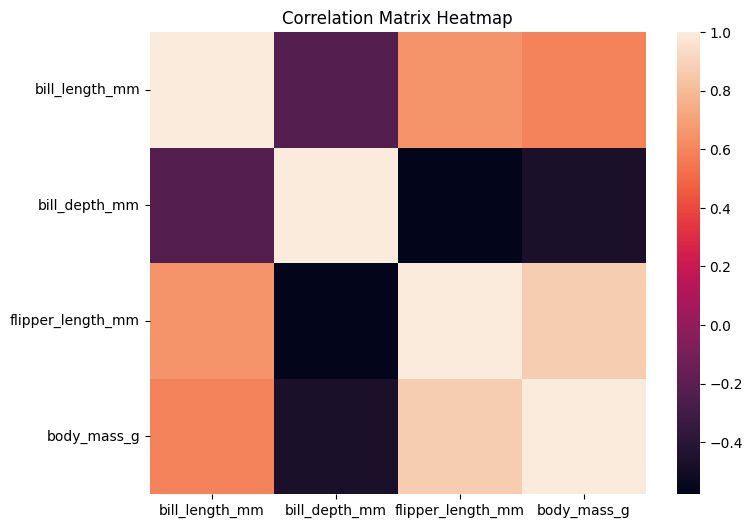

In [14]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(corr_matrix)
plt.title('Correlation Matrix Heatmap')
plt.show()